# Used Car Price Prediction



## Problem Statement
---------------------------

Develop a pricing model that can effectively predict the price of used cars and can help businesses in devising profitable strategies using differential pricing. In the process, determine which factors affect the prices of used cars. Conduct this analysis using an appropriate method for prediction of a numerical target variable. Generate a collection of insights and recommendations to help the business.

## Data Information
---------------------------
[Source - Kaggle](https://www.kaggle.com/datasets/goyalshalini93/car-data?select=CarPrice_Assignment.csv)

Variables (in order):
- **Car_ID -** (numerical variable): Car identifier.

- **Symboling -** (categorical variable): average degree of auto is more risky than its price indicates

- **CarName -** (categorical variable): models of different car makes

- **Fueltype -**  (categorical variable): type of fuel used (Gas or Diesel)

- **Aspiration -** (categorical variable): types of car engines (Std or Turbo)

- **Doornumber -** (categorical variable): the number of doors in the car(two or four)

- **Carbody -** (categorical variable): types of car body styles(convertible, hatchback,  sedan, wagon, hatchtop)

- **Drivewheel -** (categorical variable): drive mode (rwd, fwd, 4wd)

- **Enginelocation -** (categorical variable): engine installation location(front or rear)

- **Wheelbase -** (numerical variable): The horizontal distance between the centers of the front and rear wheels of the car

- **Carlength: -** (numerical variable): length of vehicle

- **Carwidth -** (numerical variable): width of vehicle

- **Carheight -** (numerical variable): height of vehicle

- **Curbweight -** (numerical variable): weight of vehicle

- **Enginetype -** (categorical variable): The type of engine or engines powering the vehicle. (dohc, dohcv, ohcv, ohc, ohcf,  rotor, l)

- **Cylindernumber -** (categorical variable): The number of cylinders of the engine(two, twelve, three, four, five, six, eight)

- **Enginesize -**  (numerical variable): The size of the engine

- **Fuelsystem -** (categorical variable): Fuel system of the engine(1bbl, 2bbl, 4bbl, idi, mfi, mpfi,  spdi, spfi)

- **Boreratio -** (numerical variable): The ratio between the size of the cylinder bore of an engine and its piston stroke length

- **Stroke -** (numerical variable): A phase of the engine's cycle

- **Compressionratio -** (numerical variable): The ratio of the cylinders and combustion chambers of an engine at their maximum and minimum values

- **Horsepower -** (numerical variable): The output power of the engine

- **Peakrpm -** (numerical variable): The engine's peak horsepower speed

- **Citympg -** (numerical variable): Fuel consumption in urban driving

- **Highwaympg -** (numerical variable): The fuel consumption of the car when driving on the open road

- **Price -** (numerical variable): The price of a car.
     
###  Source:
 Dataset from: https://www.kaggle.com/datasets/goyalshalini93/car-data


## We will begin our analysis by importing all the necessary libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import libraries for model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

##Read in the data set using the code:

In [ ]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1kSKi2XM0g3uURvzjNDqQX0NPYKCdTuqd/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
car = pd.read_csv(csv_raw, sep=",")

# Examine the first few lines of the data set using the method
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The price of the cars indicated by the variable car is the target variable and the rest are the independent variables based on which we will predict car price.

## Get some information about the dataset using the info() method

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Double check for missing variables
missing = car.isnull().sum()
print(missing)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64




*   There are a total of 205 non-null observations in each of the columns. This indicates that there are no missing values in the data.
*   All columns in this dataset are numeric in nature except for the following variables: CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, and fuelsystem. These variabes are categorical in nature.
*   According to the variable definitions, symboling should be a categorical variable but it is listed as a numerical variable in the dataset, which needs to be changed.





In [ ]:
car['symboling'] = car['symboling'].astype(str)

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Looking at the business problem and our dataset, we do not need to drop any variables for now. All variables will be initially used for analysis and to predict the numerical price of a car in our linear regression model.



---

## Check the summary statistics of the dataset

---



In [ ]:
pd.set_option('display.float_format', str)
summary = car.describe().T
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.0,59.32,1.0,52.0,103.0,154.0,205.0
wheelbase,205.0,98.76,6.02,86.6,94.5,97.0,102.4,120.9
carlength,205.0,174.05,12.34,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,65.91,2.15,60.3,64.1,65.5,66.9,72.3
carheight,205.0,53.72,2.44,47.8,52.0,54.1,55.5,59.8
curbweight,205.0,2555.57,520.68,1488.0,2145.0,2414.0,2935.0,4066.0
enginesize,205.0,126.91,41.64,61.0,97.0,120.0,141.0,326.0
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.14,3.97,7.0,8.6,9.0,9.4,23.0


### Observations

*   **Average horsepower is around 104 hp**. It has a high range, from 48.0 hp to 288.0 hp.
*   **50% of cars have a length less than 173.2 inches**. However, there are some extreme values, seeing that the minimum car length is 141.1 inches and the maximum car length is 208.1 inches.
*   **The average highway mileage (highwaympg) is 30.75 mpg**. It has a high range with the minimum being 16.0 mpg and the maximum being 54.0 mpg.
*   **Average car width is 65.91 inches which is close to the median (65.5 inches)**. This means the distribution of cars for car width is pretty normal.
*   **Average engine size is 126.91 inches**. There's a big difference between the third quartile and the maximum (141.0 inches and 326.0 inches respectively) which means **cars of larger sizes typically have larger engine sizes which makes sense**.









---

## Univariate Analysis

---



### Check the distribution of the variables

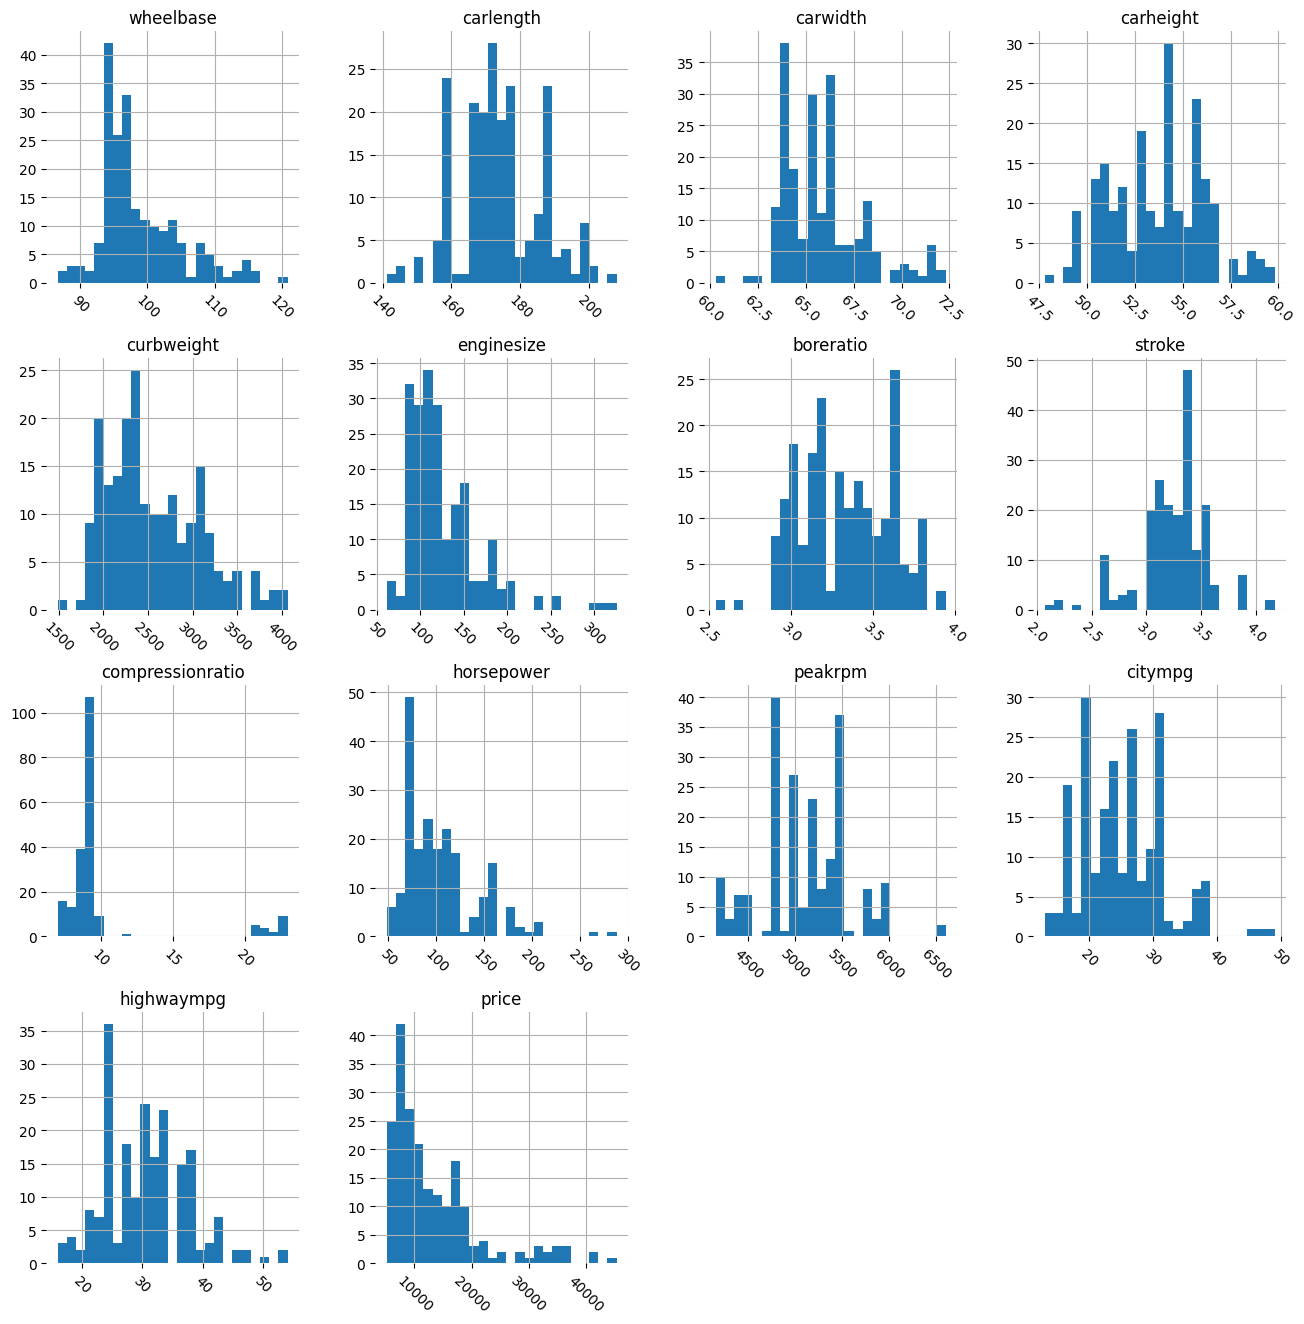

In [ ]:
# Plotting all columns to look at their distributions using histograms
cardf = car[['symboling', 'CarName', 'fueltype', 'aspiration',
            'doornumber', 'carbody', 'drivewheel', 'enginelocation',
            'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
            'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
            'boreratio', 'stroke', 'compressionratio', 'horsepower',
            'peakrpm', 'citympg', 'highwaympg', 'price']]
histogram = cardf.hist(bins = 25, figsize = (16, 16), xlabelsize = '10', xrot = -45)
sns.despine(left = True, bottom = True)
[x.title.set_size(12) for x in histogram.ravel()];
[x.yaxis.tick_left() for x in histogram.ravel()];

### Observations
The target variable is skewed to the right. Therefore, it would be a good idea to apply a log transformation in order to avoid contradicting the assumption of linearity which is a necessary condition for applying a linear regression model.

In [ ]:
car['price_log'] = np.log(car['price'])

<Axes: xlabel='price_log', ylabel='Count'>

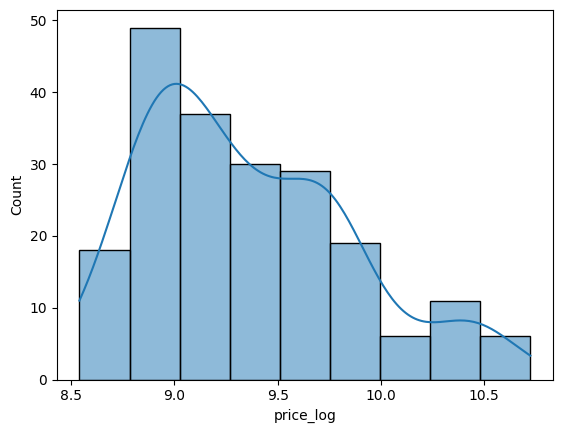

In [ ]:
sns.histplot(data = car, x = 'price_log', kde = True)

### Observations
The log-transformed variable (**price_log**) appears more normally distributed and the overall distribution looks better.

Another assumption that is necessary for using a linear regression model is that the independent variables are independent. If this condition is met, we can be relatively sure that the variables contribute unique information to the model. This can be checked by examining the relationship between the feature variables and examining the correlation matrix for multicollinearity.



---

## Bivariate Analysis

---



### Check the correlation using the heatmap

In [ ]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(car.corr())

# Create a visual view of the pairwise correlations
sns.heatmap(car.corr(), annot = True, fmt = '.2f', cmap = cmap, mask = matrix)
plt.show()

ValueError: could not convert string to float: 'alfa-romero giulia'

<Figure size 1200x800 with 0 Axes>

**Observations:**
Positive correlations of note are observed between:
*   **carlength** and **wheelbase**
*   **carwidth** and **wheelbase**
*   **carwidth** and **carlength**
*   **curbweight** and **wheelbase**
*   **curbweight** and **carlength**
*   **curbweight** and **carwidth**
*   **enginesize** and **carwidth**
*   **enginesize** and **curbweight**
*   **horsepower** and **curbweight**
*   **horsepower** and **enginesize**
*   **highwaympg** and **citympg**
*   **price_log** and **carlength**
*   **price_log** and **carwidth**
*   **price_log** and **curbweight**
*   **price_log** and **enginesize**
*   **price_log** and **horsepower**

Negative correlations of note are observed between:
*   **citympg** and **curbweight**
*   **citympg** and **horsepower**
*   **highwaympg** and **curbweight**
*   **highwaympg** and **horsepower**
*   **log_price** and **highwaympg**
*   **log_price** and **citympg**

















### Create scatterplots to visualize the relationships between the features having significant correlations (>0.7)

<function matplotlib.pyplot.show(close=None, block=None)>

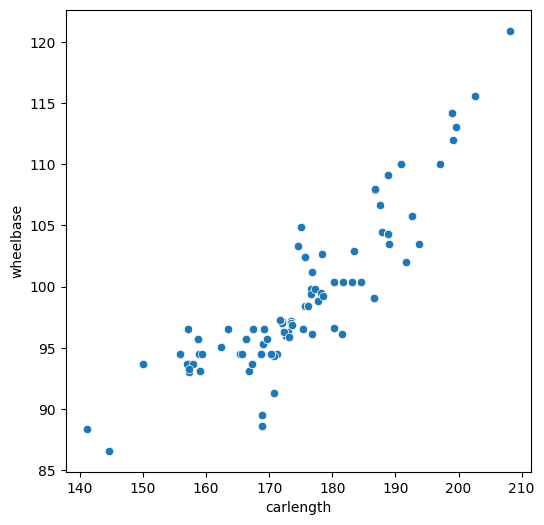

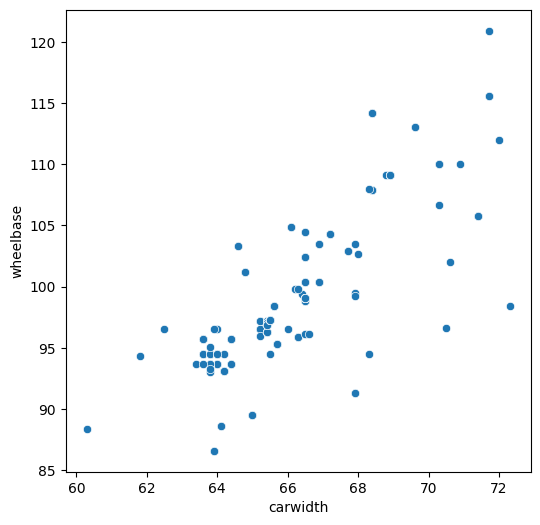

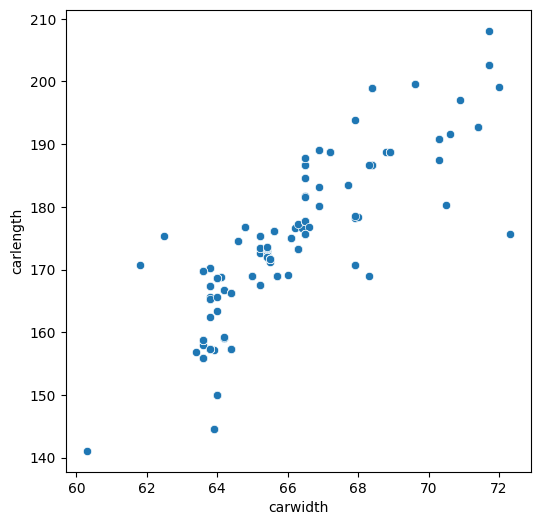

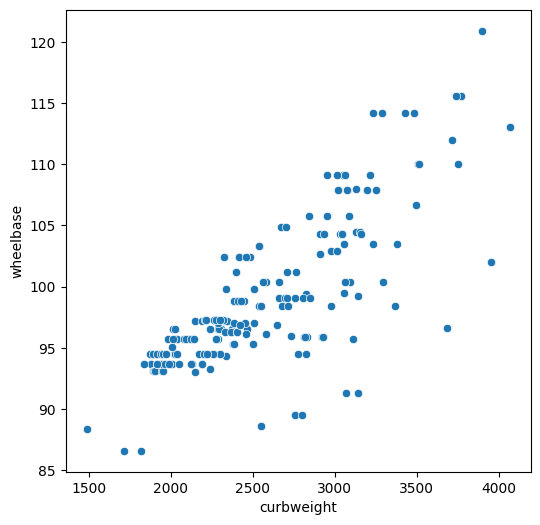

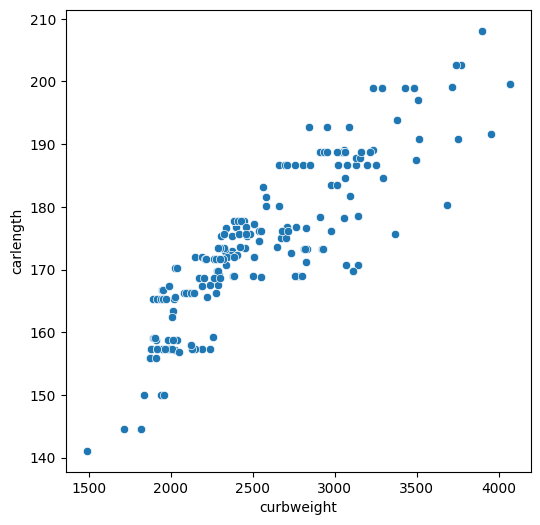

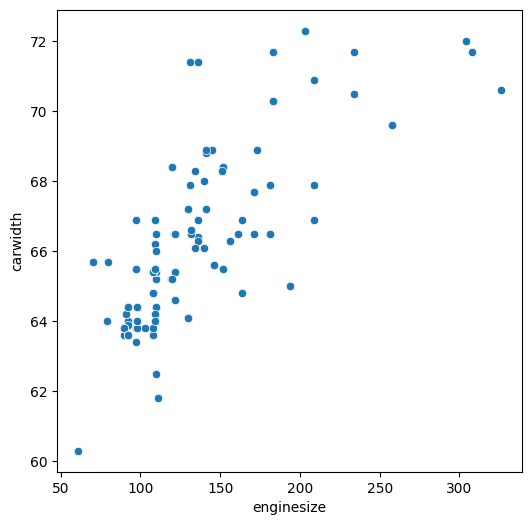

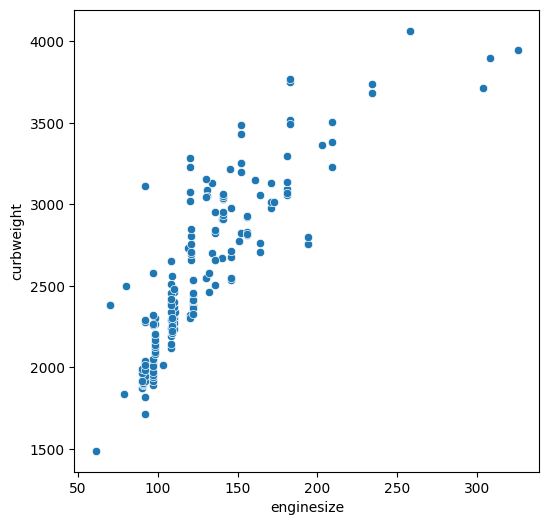

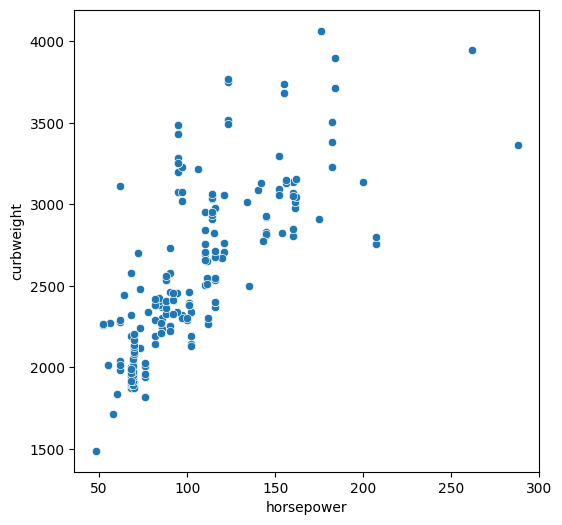

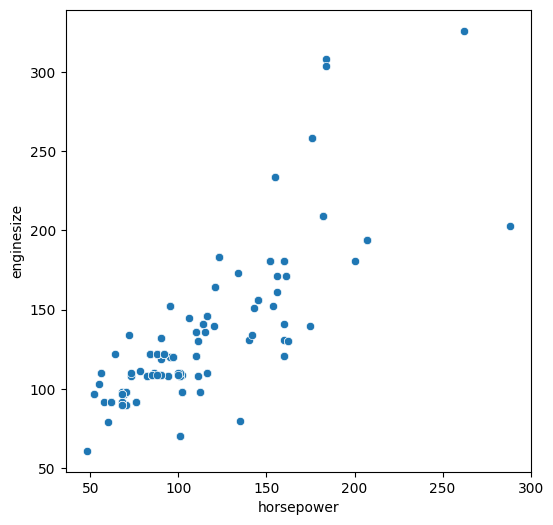

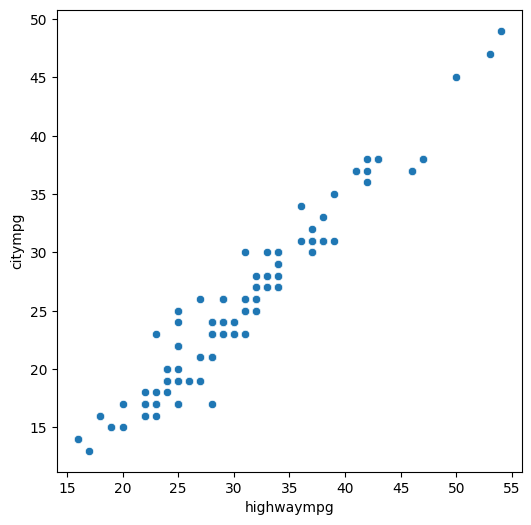

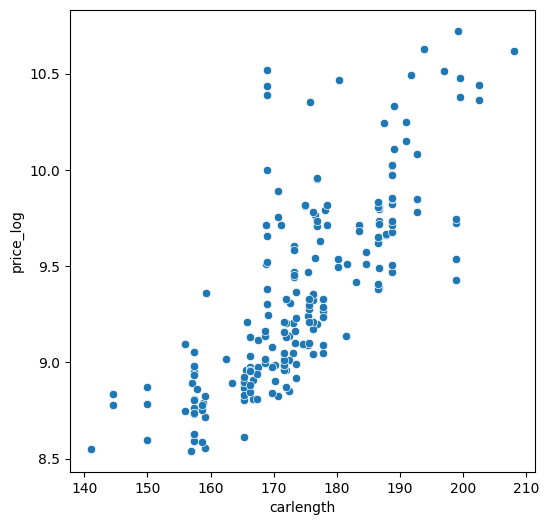

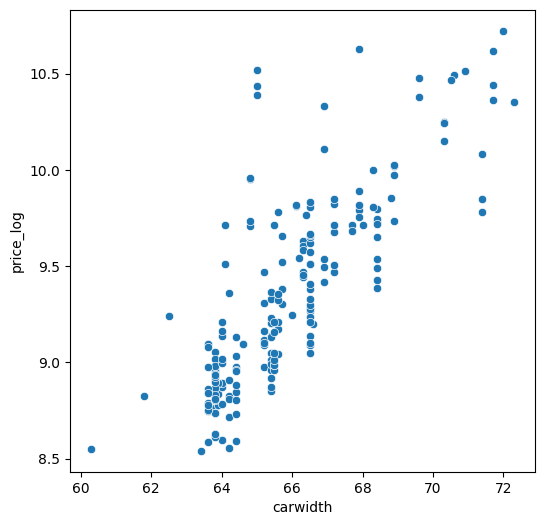

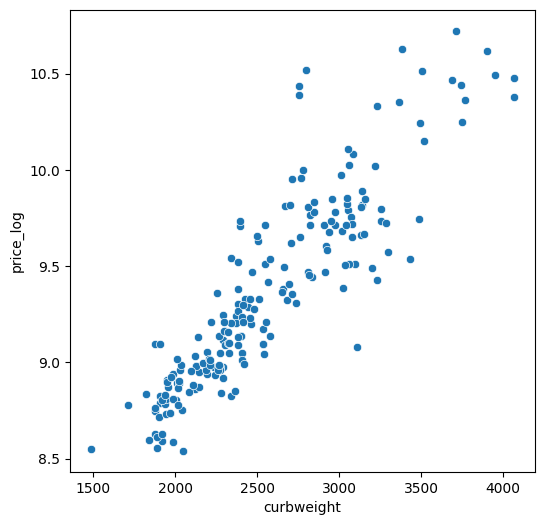

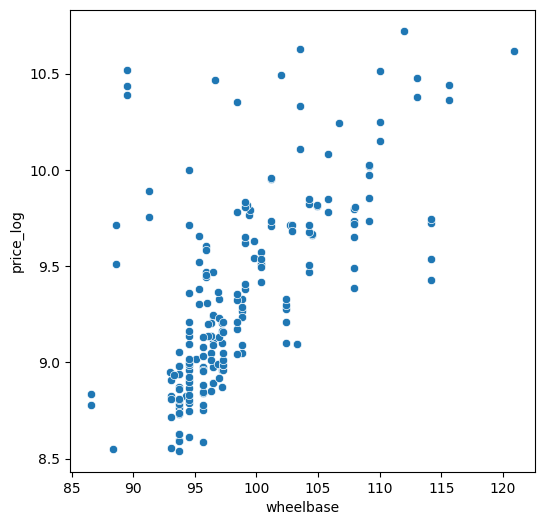

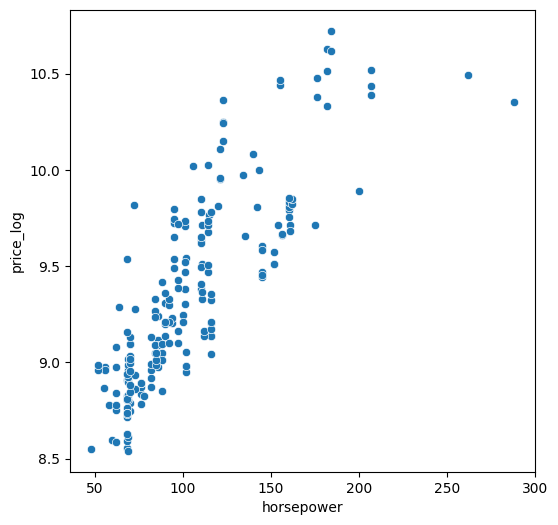

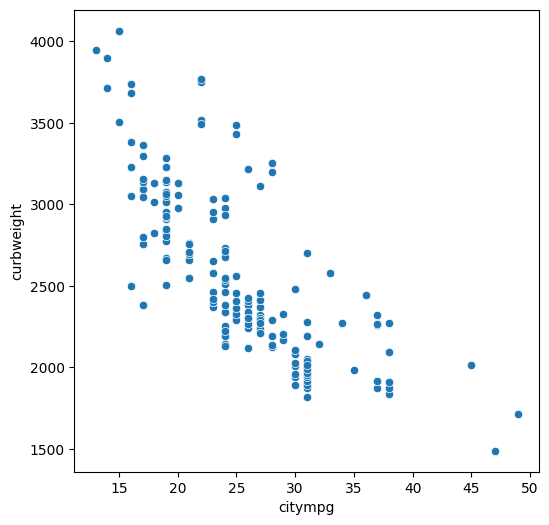

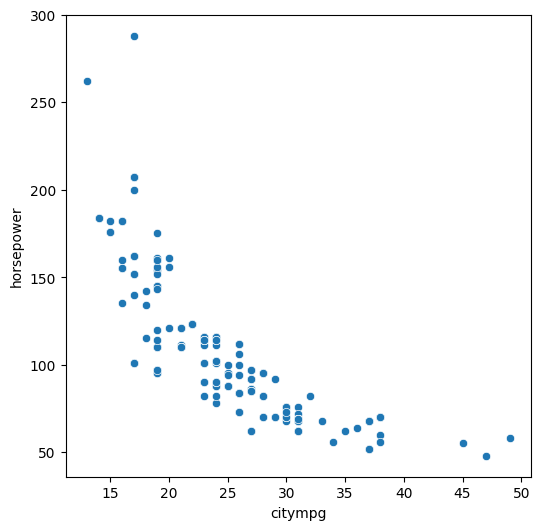

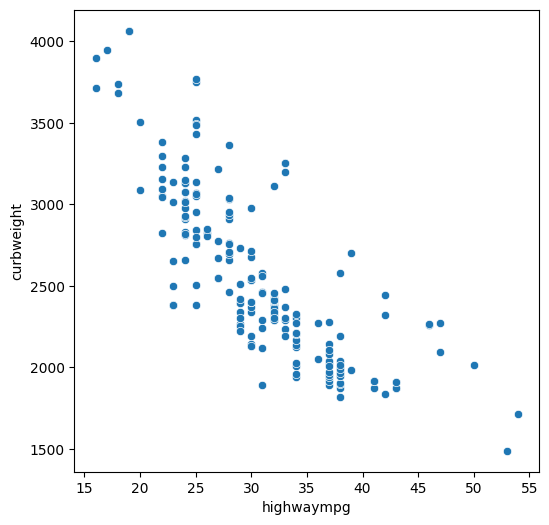

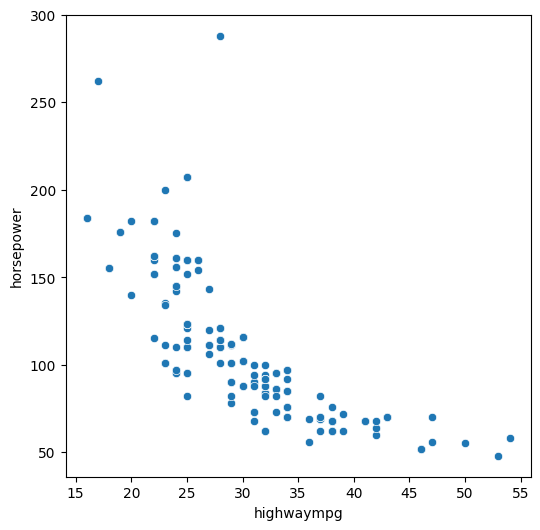

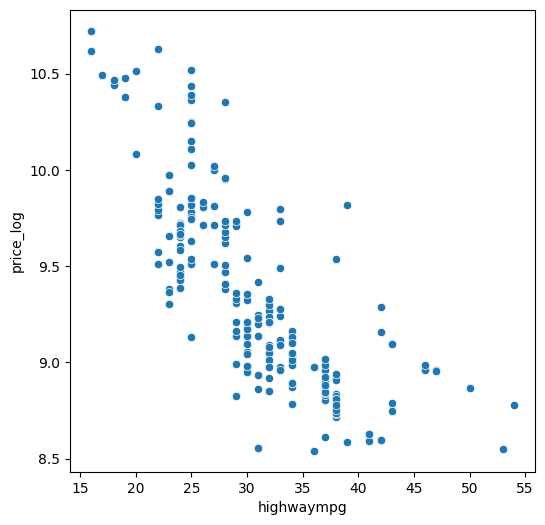

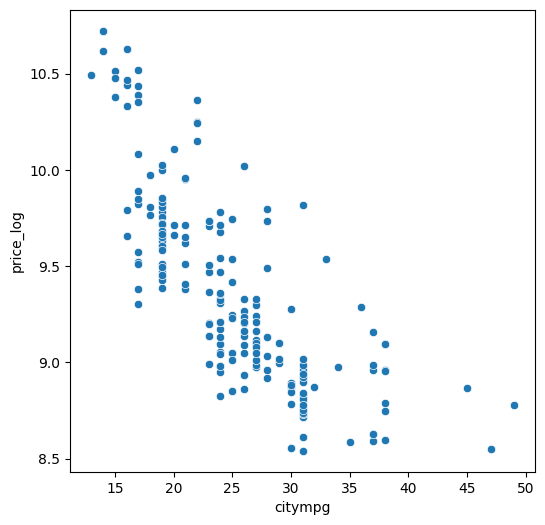

In [ ]:
# Scatterplot of carlength vs. wheelbase
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'carlength', y = 'wheelbase')
plt.show

# Scatterplot of carwidth vs. wheelbase
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'carwidth', y = 'wheelbase')
plt.show

# Scatterplot of carwidth vs. carlength
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'carwidth', y = 'carlength')
plt.show

# Scatterplot of curbweight vs. wheelbase
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'curbweight', y = 'wheelbase')
plt.show

# Scatterplot of curbweight vs. carlength
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'curbweight', y = 'carlength')
plt.show

# Scatterplot of enginesize vs. carwidth
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'enginesize', y = 'carwidth')
plt.show

# Scatterplot of enginesize vs. curbweight
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'enginesize', y = 'curbweight')
plt.show

# Scatterplot of horsepower vs. curbweight
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'horsepower', y = 'curbweight')
plt.show

# Scatterplot of horsepower vs. enginesize
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'horsepower', y = 'enginesize')
plt.show

# Scatterplot of highwaympg vs. citympg
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'highwaympg', y = 'citympg')
plt.show

# Scatterplot of carlength vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'carlength', y = 'price_log')
plt.show

# Scatterplot of carwidth vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'carwidth', y = 'price_log')
plt.show

# Scatterplot of curbweight vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'curbweight', y = 'price_log')
plt.show

# Scatterplot of enginesize vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'wheelbase', y = 'price_log')
plt.show

# Scatterplot of horsepower vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'horsepower', y = 'price_log')
plt.show

# Scatterplot of citympg vs. curbweight
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'citympg', y = 'curbweight')
plt.show

# Scatterplot of citympg vs. horsepower
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'citympg', y = 'horsepower')
plt.show

# Scatterplot of highwaympg vs. curbweight
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'highwaympg', y = 'curbweight')
plt.show

# Scatterplot of highwaympg vs. horsepower
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'highwaympg', y = 'horsepower')
plt.show

# Scatterplot of highwaympg vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'highwaympg', y = 'price_log')
plt.show

# Scatterplot of citympg vs. price_log
plt.figure(figsize = (6, 6))
sns.scatterplot(data = car, x = 'citympg', y = 'price_log')
plt.show

### Observations
There appears to be associations between some pairs of feature variables, which isn't desireable for linear regression.

Boxplots to visualize the distributions of each categorical variable of the target variable (price). We will exclude a boxplot for the variable CarName since there are too many values in the dataset.

<Axes: xlabel='symboling', ylabel='price'>

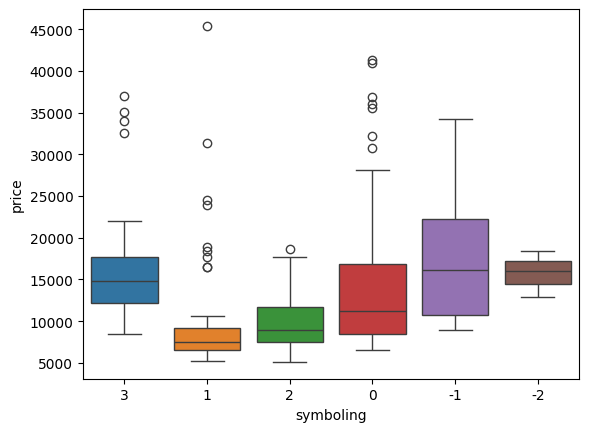

In [ ]:
# Symboling vs. Price
sns.boxplot(x = "symboling", y = "price", data = car,
            palette = sns.color_palette(), hue = "symboling", legend = False)

<Axes: xlabel='fueltype', ylabel='price'>

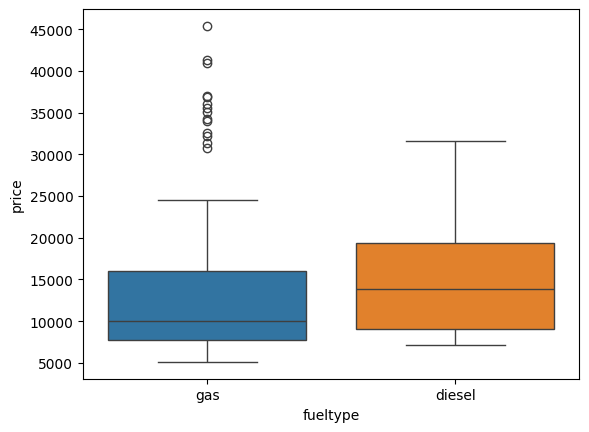

In [ ]:
# FuelType vs. Price
sns.boxplot(x = "fueltype", y = "price", data = car,
            palette = sns.color_palette(), hue = "fueltype", legend = False)

<Axes: xlabel='aspiration', ylabel='price'>

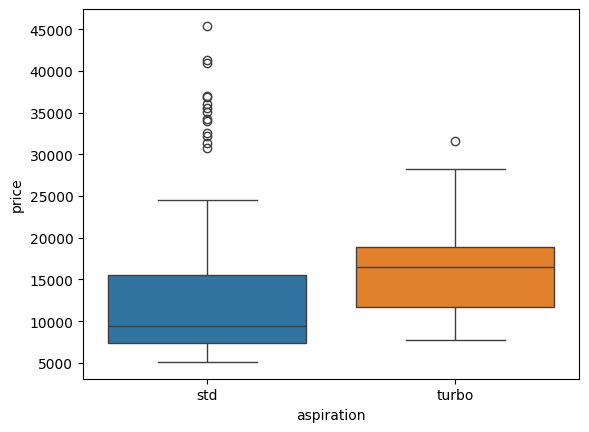

In [ ]:
# Aspiration vs. Price
sns.boxplot(x = "aspiration", y = "price", data = car,
            palette = sns.color_palette(), hue = "aspiration", legend = False)

<Axes: xlabel='doornumber', ylabel='price'>

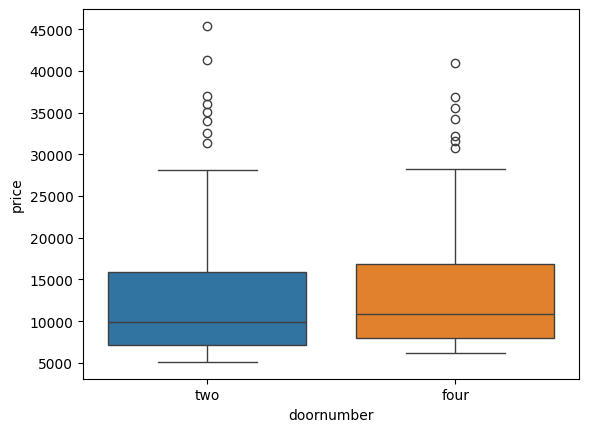

In [ ]:
# DoorNumber vs. Price
sns.boxplot(x = "doornumber", y = "price", data = car,
            palette = sns.color_palette(), hue = "doornumber", legend = False)

<Axes: xlabel='carbody', ylabel='price'>

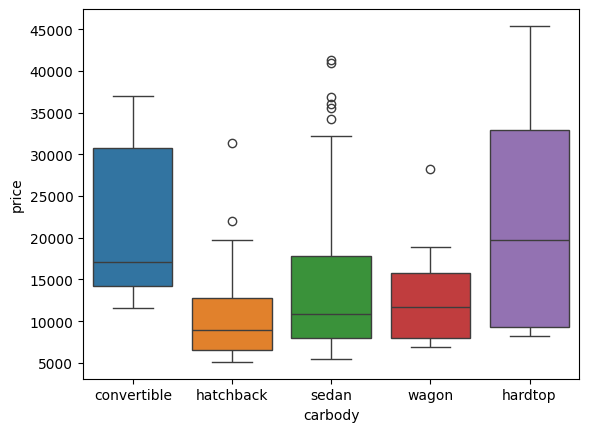

In [ ]:
# CarBody vs. Price
sns.boxplot(x = "carbody", y = "price", data = car,
            palette = sns.color_palette(), hue = "carbody", legend = False)

<Axes: xlabel='drivewheel', ylabel='price'>

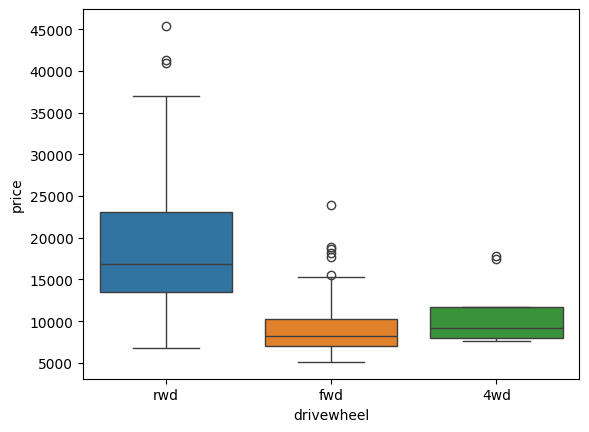

In [ ]:
# DriveWheel vs. Price
sns.boxplot(x = "drivewheel", y = "price", data = car,
            palette = sns.color_palette(), hue = "drivewheel", legend = False)

<Axes: xlabel='enginelocation', ylabel='price'>

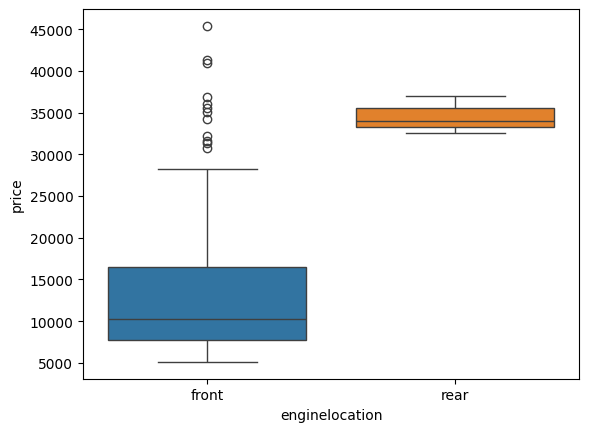

In [ ]:
# EngineLocation vs. Price
sns.boxplot(x = "enginelocation", y = "price", data = car,
            palette = sns.color_palette(), hue = "enginelocation", legend = False)

<Axes: xlabel='enginetype', ylabel='price'>

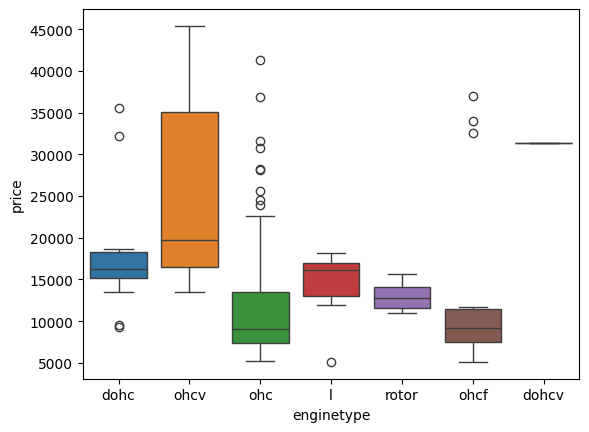

In [ ]:
# EngineType vs. Price
sns.boxplot(x = "enginetype", y = "price", data = car,
            palette = sns.color_palette(), hue = "enginetype", legend = False)

<Axes: xlabel='cylindernumber', ylabel='price'>

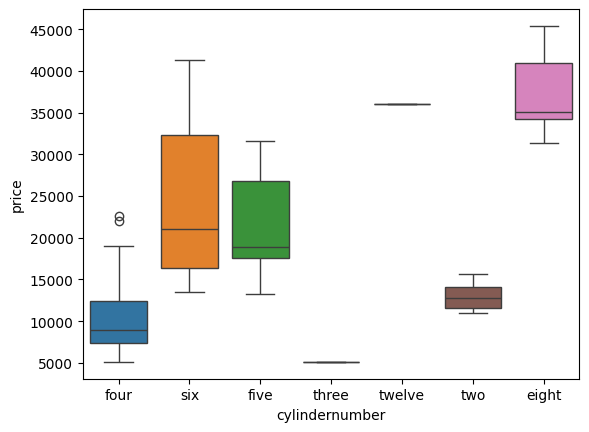

In [ ]:
# CylinderNumber vs. Price
sns.boxplot(x = "cylindernumber", y = "price", data = car,
            palette = sns.color_palette(), hue = "cylindernumber", legend = False)

In [ ]:
# FuelSystem vs. Price
sns.boxplot(x = "fuelsystem", y = "price", data = car,
            palette = sns.color_palette(), hue = "fuelsystem", legend = False)

### Observations
There are outliers for many feature variables which is skewing the distributions. As a result, we will consider normalizing these feature variables later in the pre-processing step.

---

## Analysis of Categorical Variables

---

Data summaries to show the percent distribution of the values of each categorical variable

In [ ]:
# Separating the categorical variables from numerical variables
cat_cols = car[['symboling', 'CarName', 'fueltype', 'aspiration',
                'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                'enginetype', 'cylindernumber', 'fuelsystem']]

# Printing the % sub categories of each category
for i in cat_cols:
    print(car[i].value_counts(normalize = True))
    print('*'*40)

### Observations
*   Most cars are of **symboling 0**, meaning they are less risky than their prices indicate
*   Most cars use **gas** as their fueltype
*   Most cars have an **std** car engine
*   Most cars have **four** doors
*   Most cars are either **sedans** or **hatchbacks**
*   Most cars have an engine located in the **back** rather than front
*   Most cars have **four cylinders** of their engine
*   Most cars have either an **mpfi** or **2bbl** fuelsystem


Bar charts to visualize each of the categorical variables in the dataset. We will exclude a bar chart for the variable CarName since there are too many values in the dataset.

In [ ]:
# Symboling vs. Price
bar1 = sns.barplot(x = 'symboling', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# FuelType vs. Price
bar3 = sns.barplot(x = 'fueltype', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# Aspiration vs. Price
bar4 = sns.barplot(x = 'aspiration', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# DoorNumber vs. Price
bar5 = sns.barplot(x = 'doornumber', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# CarBody vs. Price
bar6 = sns.barplot(x = 'carbody', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# DriveWheel vs. Price
bar7 = sns.barplot(x = 'drivewheel', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# EngineLocation vs. Price
bar8 = sns.barplot(x = 'enginelocation', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# EngineType vs.
bar9 = sns.barplot(x = 'enginetype', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# CylinderNumber vs. Price
bar10 = sns.barplot(x = 'cylindernumber', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

In [ ]:
# FuelSystem vs. Price
bar11 = sns.barplot(x = 'fuelsystem', y = 'price', data = car,
                        palette = 'Blues_d', errorbar = None)

### Observations
*   Cars that use **diesel** for their fueltype cost more
*   Cars that have **four doors** cost slightly more than cars with only two doors
*   Cars with an engine located in the **rear** of the vehicle cost more
*   Cars with an **mpfi fuelsystem** type cost the most

### Converting Categorical Variables Into Dummary Variables
Before doing so, check for unique values in the column using the `unique()` method.

In [ ]:
car['symboling'].unique()

In [ ]:
car['CarName'].unique()

In [ ]:
car['fueltype'].unique()

In [ ]:
car['aspiration'].unique()

In [ ]:
car['doornumber'].unique()

In [ ]:
car['carbody'].unique()

In [ ]:
car['drivewheel'].unique()

In [ ]:
car['enginelocation'].unique()

In [ ]:
car['enginetype'].unique()

In [ ]:
car['cylindernumber'].unique()

Since there are many unique values for the variable CarName, we will consider only categorizing cars by brand name rather than including specific models. We will accomplish this via feature engineering later.

In [ ]:
# Feature engineering to modify the 'CarName' variable
#car['CarMake'] = car['CarName'].apply(lambda x: x.split(' ')[0])
#car['CarMake'] = car['CarMake'].str.lower()
#car_make_dummies = pd.get_dummies(car['CarMake'], prefix='CarMake')
#data = car.drop(['CarName', 'CarMake'], axis=1)
#data = pd.concat([data, car_make_dummies], axis=1)
#print(data.head())

### Convert variables into dummies

In [ ]:
# Create list of dummy columns
cat_cols_dummies = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

# Create dummy variables and reassign the data frame
car = pd.get_dummies(data = car, columns = cat_cols_dummies, drop_first= True)
car.head()

In [ ]:
# Convert categorical
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
carbody_dummies = pd.get_dummies(car['carbody'], prefix='carbody')
data = car.drop('carbody', axis=1)
data = pd.concat([data, carbody_dummies], axis=1)
print(data.head())

## Feature Engineering

Combine values of the categorical variable CarName to create less categories. For example, "Honda Accord" and "Honda Civic" becomes one category, "Honda."

In [ ]:
# Feature engineering
car['CarMake'] = car['CarName'].apply(lambda x: x.split(' ')[0])
car['CarMake'] = car['CarMake'].str.lower()
car_make_dummies = pd.get_dummies(car['CarMake'], prefix='CarMake')
data = car.drop(['CarName', 'CarMake'], axis=1)
data = pd.concat([data, car_make_dummies], axis=1)
print(data.head())

## Remove feature variables that are highly correlated with other features

In [ ]:
# Removing highly correlated features
correlation_matrix = car.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
car.drop(to_drop, axis=1, inplace=True)
print(to_drop)

## Remove outliers

In [ ]:
# Removing outliers
Q1 = car.quantile(0.25, numeric_only=True)
Q3 = car.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
numeric_cols = data.select_dtypes(include=[np.number]).columns
mask = (data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))
data_no_outliers = data[~(mask.any(axis=1))]
print(f"Original number of rows: {len(data)}")
print(f"Number of rows after outlier removal: {len(data_no_outliers)}")

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

---

## Partitioning the Data

---

### Separate the target variable from the collection of feature variables

In [ ]:
# Separate the dependent and independent variables
y = car['price_log']
X = car.drop(columns = {'price', 'price_log'})

# Add the intercept term
X = sm.add_constant(X)

### Scale the predictor variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc = StandardScaler() # Imported with the libraries, we give it an alias here
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### Split the data into training and testing sets

In [ ]:
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

## Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data. Fetaures having a VIF score > 5 will be dropped/treated until all the features have a VIF score < 5.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

*   There are ___ variables with a high VIF (list them here). We will remove them as they have the highest VIF values and check the multicollinearity again.

**Drop the column(s) '___' from the training data and check if multicollinearity is removed**

In [ ]:
# Create the model after dropping variable
X_train = X_train.drop(columns=-----)

# Check for VIF
print(checking_vif(X_train))

Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

In [ ]:
# Create the model
model1 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model1.summary()

Observations:
*   F-statistic is...
*   The R-squared and the adjusted R-squared values...
*   p-values of predictor variables...(indicate if there is statistical significance)